# Predict units_sold
## Problem statement:

**Problem Statement
One of the largest retail chains in the world wants to use their vast data source to build an `efficient forecasting model` to `predict the sales for each SKU` in its portfolio at its 76 different stores using historical sales data for the past 3 years on a `week-on-week basis`. Sales and promotional information is also available for each week - product and store wise.**

In [1]:
#importing necessary packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#loading train and test dataset
train = pd.read_csv("train_0irEZ2H.csv")
test = pd.read_csv('test_nfaJ3J5.csv')

In [3]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


# Overview 

In [4]:
train.shape,test.shape

((150150, 9), (13860, 8))

* 1.5 lacs record its huge dataset a pickle would have been a better option

In [5]:
train.dtypes

record_ID            int64
week                object
store_id             int64
sku_id               int64
total_price        float64
base_price         float64
is_featured_sku      int64
is_display_sku       int64
units_sold           int64
dtype: object

# Inference
* record_id,total_price,base_price,units_sold data_types is good because the values match the datatypes 
* week's datatype is wrong because column value contains
* store_id,sku_id,is_featured_sku,is_display_sku requires further more investigation to conclude they converted to a category but as of now they look like they can be converted to category



# Action points
* Investigate store_id,sku_id,is_featured_sku,is_display_sku columns

In [6]:
def check_cat_conversion(threshold = 5):
    res = []
    for j,i in enumerate(train.columns):
        val = round((train[i].nunique()/train.shape[0])*100,2)
        
        if val<=threshold and (train[i].dtypes not in ('float64','object')):
            res.append((i,val))
            #df[i] = df[i].astype('category')
        else:
            continue
    return res


In [7]:
check_cat_conversion()

[('store_id', 0.05),
 ('sku_id', 0.02),
 ('is_featured_sku', 0.0),
 ('is_display_sku', 0.0),
 ('units_sold', 0.47)]

# Inference
* unit sold can be skipped 
# action points
* rest all can be converted to type category

In [8]:
train['week'] =pd.to_datetime(train['week'])
train[['week']].head()

,week
0,2011-01-17
1,2011-01-17
2,2011-01-17
3,2011-01-17
4,2011-01-17


In [9]:
# train['store_id'] = train['store_id'].astype('category')
# train['sku_id'] = train['sku_id'].astype('category')
# train.info()

# EDA

In [10]:
train.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


# observations
* recordID can be ignored beacuse its basically a no. that identitifies each row uniquely
* is_feartured_sku can be ignored beacuse its a category and for training it is necessary it remains a number
* is_display_sku can be ignored beacuse its a category and for training it is necessary it remains a number
## total_price
* mean > median a slight right skewness will be there in the data and the standard deviation is high so data is not well distributed and mean > standard deviation the normal curve will be a bit flattened and range of the data is 41 to 562
* outliers are present 
## base_price
* mean > median a slight right skewness will be there in the data and the standard deviation is high so data is not well distributed and mean > standard deviation the normal curve will be a bit flattened and range of the data is 61 to 562.
* comparing the ranges of the total_price and base price it is clear that there total_price < base_price which means some items are being sold below base price hence reason can be investigated for this loss in total_price
* outliers are present

## units_sold
* mean > median a right skewness will be there in the data and the standard deviation is high so data is not well distributed and mean < standard deviation the normal curve will be a sharp peak and range of the data is 1 to 2876
* outliers are present

In [11]:
train.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

* only 1 null can be dropped

In [12]:
train.dropna(inplace = True)

In [13]:
train.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

# Time based analysis

As our Aim is to predict unit sold for a given time. So, focusing on Time based analysis

<AxesSubplot:xlabel='week'>

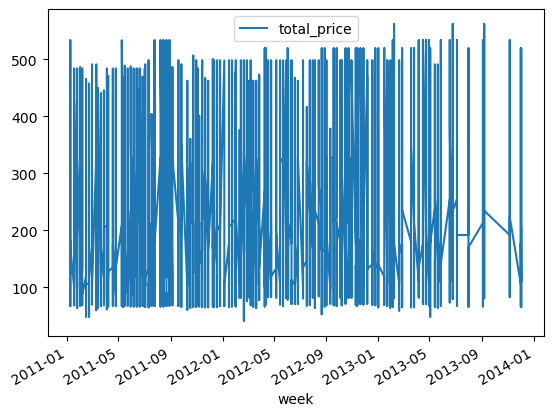

In [14]:
train[['week','total_price']].set_index('week').plot()

# Insight

## Total price is not corelated to weekly data

<AxesSubplot:xlabel='week'>

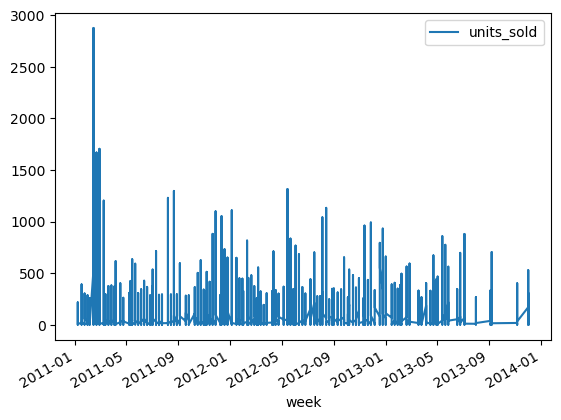

In [15]:
train[['week','units_sold']].set_index('week').plot()

<AxesSubplot:xlabel='total_price', ylabel='Density'>

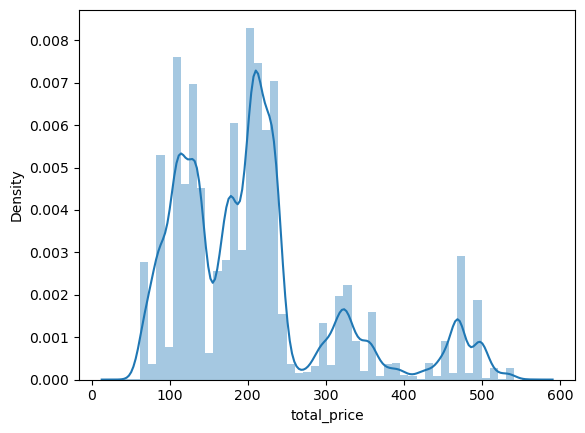

In [16]:
sns.distplot(train['total_price'])

# Outlier analysis

<AxesSubplot:xlabel='units_sold', ylabel='Density'>

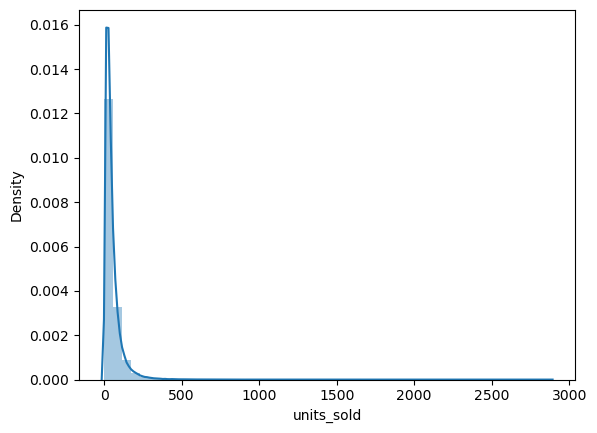

In [17]:
sns.distplot(train['units_sold'])

# Insight:
Clearly there are outliers

In [18]:
train['units_sold'].describe().T

count    150149.000000
mean         51.674543
std          60.207962
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

In [19]:
Q1 = train['units_sold'].quantile(0.05)
Q3 = train['units_sold'].quantile(0.95)
IQR = Q3 - Q1
train = train[~((train['units_sold'] < (Q1 - 1.5 * IQR)) |(train['units_sold'] > (Q3 + 1.5 * IQR)))]

<AxesSubplot:xlabel='units_sold', ylabel='Density'>

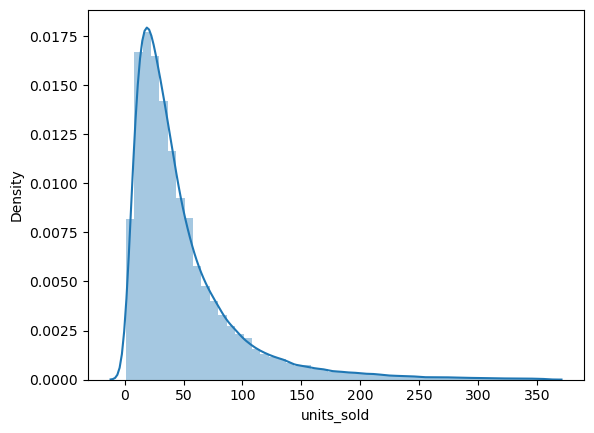

In [20]:
sns.distplot(train['units_sold'])

In [21]:
train['units_sold'].describe().T

count    149365.000000
mean         49.147940
std          46.693912
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max         358.000000
Name: units_sold, dtype: float64

# Insght :

**STD drops and goes near average hence, removal of outlies is justified** 

# Converting Dataset sku_id and week wise total price

In [22]:
train['week']=pd.to_datetime(train['week'])
df = train.groupby(['sku_id','week'])['total_price','units_sold'].sum()
df = df.reset_index()

In [23]:
def conv_week(x):
    a = ''
    if len(str(x.month)) == 1:
        a = '0'+ str(x.month)
    else:
        a =str(x.month)
    return int(str(x.year)+a)
        

In [24]:
df['week'] = df['week'].apply(conv_week)

In [25]:
df

,sku_id,week,total_price,units_sold
0,216233,201101,9534.6750,3578
1,216233,201101,9521.1375,3097
2,216233,201101,9772.6500,2837
3,216233,201101,9760.5375,2984
4,216233,201102,9740.5875,2607
...,...,...,...,...
3635,679023,201309,1917.3375,141
3636,679023,201309,2109.7125,73
3637,679023,201311,2109.7125,119
3638,679023,201312,1634.4750,177


<AxesSubplot:>

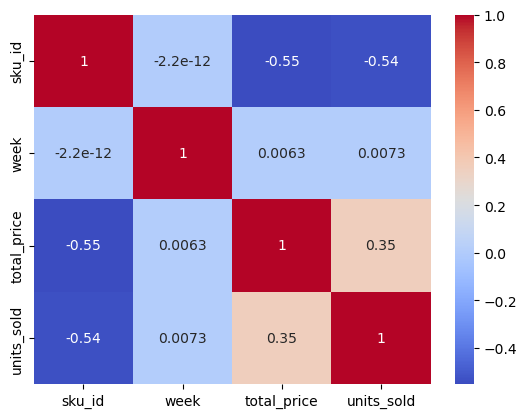

In [26]:
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)

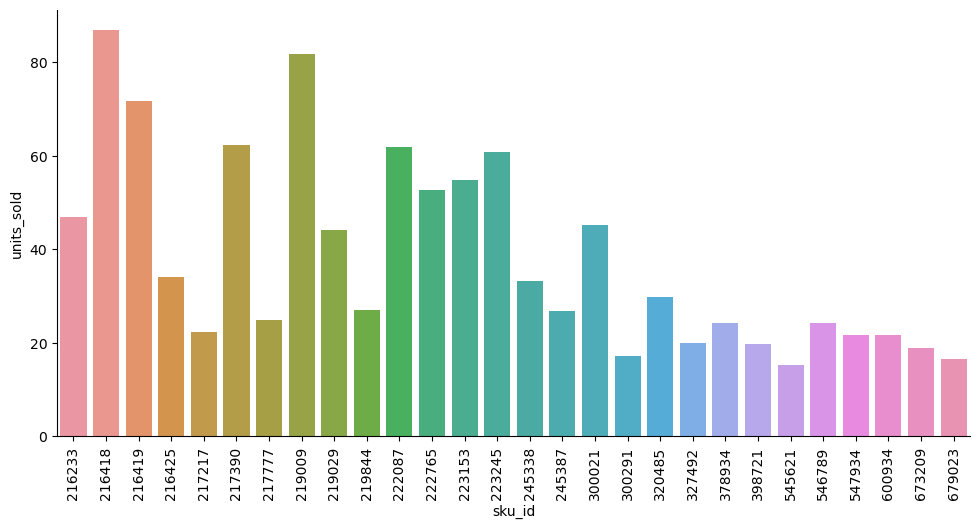

In [27]:
sns.catplot(x='sku_id', y = 'units_sold', data= train, kind='bar', aspect=2, n_boot=1 )
plt.xticks(rotation=90)
plt.show()

# Insight:
- sku_id is a dominant catagory 

In [28]:
dum1 = pd.get_dummies(df['sku_id'], drop_first=True)
df = pd.concat([df, dum1], axis = 1)

df.drop('sku_id', axis=1, inplace=True)

In [29]:
df

,week,total_price,units_sold,216418,216419,216425,217217,217390,217777,219009,...,320485,327492,378934,398721,545621,546789,547934,600934,673209,679023
0,201101,9534.6750,3578,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,201101,9521.1375,3097,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,201101,9772.6500,2837,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,201101,9760.5375,2984,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,201102,9740.5875,2607,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3635,201309,1917.3375,141,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3636,201309,2109.7125,73,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3637,201311,2109.7125,119,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3638,201312,1634.4750,177,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# insight:
1. Its very clear that we need to train a regression model so catagorical Data will not help. 
2. Total Price and Base Price is almost same so need to use only one out of these.

<AxesSubplot:>

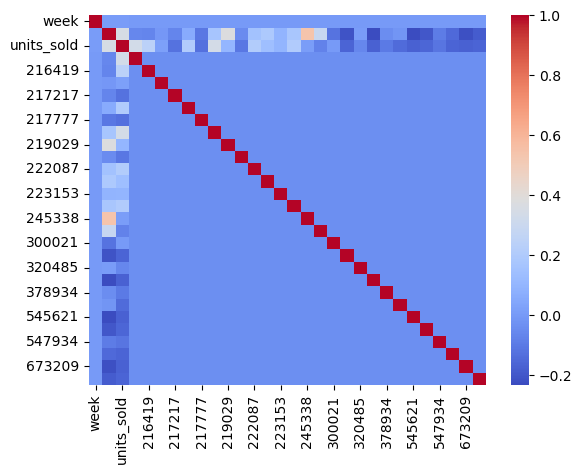

In [30]:
sns.heatmap(df.corr(),cmap='coolwarm')

# Insight

1. We will use total price and month to predict units sold

<AxesSubplot:>

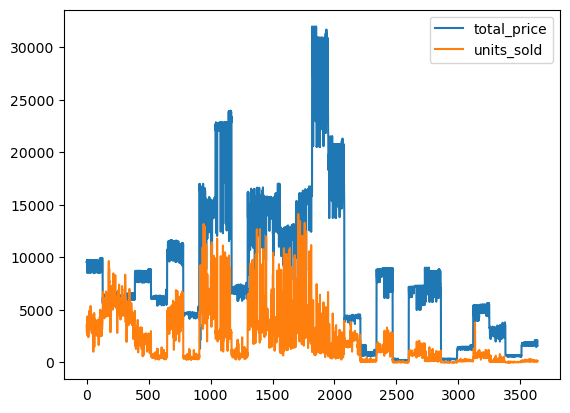

In [31]:
df[['total_price','units_sold']].plot()

# Insight:
- unit sold and total price is sharing some trend 

In [32]:
df.dropna(inplace=True)

In [33]:
x = df.drop('units_sold', axis=1)
y = df['units_sold']

# Spliting Data for training and testing

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33,random_state=90)

# Linear regression 

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [36]:
from sklearn.metrics import r2_score
pred = model.predict(x_test)
print("Model Accuracy: ",round(r2_score(y_test, pred),2)*100,"%")

Model Accuracy:  84.0 %


### Model Accuracy : 84%


# Model analysis using different metrics

In [37]:
print('Mean:  ', round(df['units_sold'].mean()/1000,2),'T Units per week')
print('Median:', round(df['units_sold'].median()/1000,2),'T Units per week')
print('Max:   ', round(df['units_sold'].max()/1000,2),'T Units per week')
print('STD:   ', round(df['units_sold'].std()/1000,2),'T Units per week')

Mean:   2.02 T Units per week
Median: 1.1 T Units per week
Max:    14.13 T Units per week
STD:    2.23 T Units per week


In [38]:
from sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score
print('MAE: ',round(mean_absolute_error(y_test, pred)/1000,2),'T Units per week')
print('MSE: ',round(mean_squared_error(y_test, pred)/1000,2),'T Units per week')
print('RMSE: ',round(np.sqrt(mean_squared_error(y_test, pred))/1000,2),'T Units per week')
print('Variance: ',round(explained_variance_score(y_test, pred),2)*100,'%')


MAE:  0.47 T Units per week
MSE:  814.72 T Units per week
RMSE:  0.9 T Units per week
Variance:  84.0 %


# Insight:
1. RMSE is even below then STD of data set so, good model.
2. Variance score is excellent, hence good explanibility of model.
3. MAE is also very less from mean so good model.

Text(0.5, 1.0, 'Model Performance on weekly data')

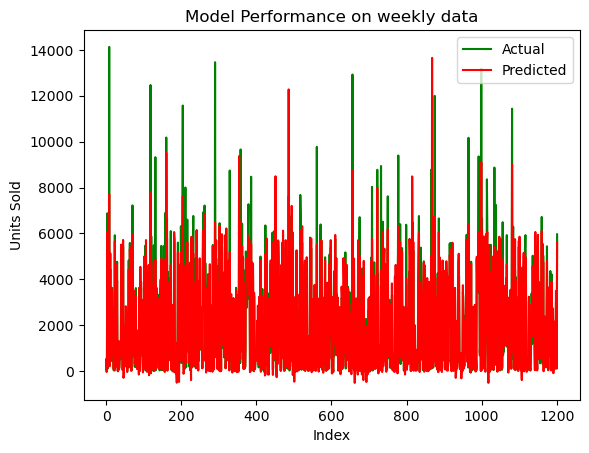

In [40]:
plt.plot([i for i in range(len(y_test))],y_test, label='Actual', color='green')
plt.plot([i for i in range(len(pred))],pred, label='Predicted', color='red')
plt.legend()
plt.xlabel("Index")
plt.ylabel("Units Sold")
plt.title("Model Performance on weekly data")

# Now lets convert test data into required format and check actual result.

In [41]:
test = pd.read_csv('test_nfaJ3J5.csv')
test

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0
...,...,...,...,...,...,...,...,...
13855,232281,01/10/13,9984,223245,241.5375,241.5375,0,0
13856,232282,01/10/13,9984,223153,240.8250,240.8250,0,0
13857,232285,01/10/13,9984,245338,382.6125,401.8500,1,1
13858,232286,01/10/13,9984,547934,191.6625,191.6625,0,0


In [42]:
test['week']=pd.to_datetime(test['week'])
df1 = test.groupby(['sku_id','week'])['total_price'].sum()
df1 = df1.reset_index()

In [43]:
df2 = df1['sku_id']

In [44]:
df1

,sku_id,week,total_price
0,216233,2013-01-10,9289.5750
1,216233,2013-03-09,9827.5125
2,216233,2013-06-08,8585.6250
3,216233,2013-07-16,9940.0875
4,216233,2013-07-23,8562.1125
...,...,...,...
331,679023,2013-08-20,2109.7125
332,679023,2013-08-27,1648.0125
333,679023,2013-09-17,2088.3375
334,679023,2013-09-24,2109.7125


In [45]:
df1['week'] = df1['week'].apply(conv_week)

In [46]:
dum1 = pd.get_dummies(df1['sku_id'], drop_first=True)
df1 = pd.concat([df1, dum1], axis = 1)

df1.drop('sku_id', axis=1, inplace=True)

# dataset is prepared for model

In [47]:
df1

,week,total_price,216418,216419,216425,217217,217390,217777,219009,219029,...,320485,327492,378934,398721,545621,546789,547934,600934,673209,679023
0,201301,9289.5750,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,201303,9827.5125,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,201306,8585.6250,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,201307,9940.0875,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,201307,8562.1125,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,201308,2109.7125,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
332,201308,1648.0125,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
333,201309,2088.3375,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
334,201309,2109.7125,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
x_test.columns.equals(df1.columns)

True

df1 have same columns as x_test hence its ready to feed in to model 

In [49]:
df1['p_units_sold']=abs(model.predict(df1).round())

In [50]:
df1

,week,total_price,216418,216419,216425,217217,217390,217777,219009,219029,...,327492,378934,398721,545621,546789,547934,600934,673209,679023,p_units_sold
0,201301,9289.5750,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3533.0
1,201303,9827.5125,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3216.0
2,201306,8585.6250,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3952.0
3,201307,9940.0875,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3151.0
4,201307,8562.1125,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3967.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,201308,2109.7125,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,22.0
332,201308,1648.0125,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,295.0
333,201309,2088.3375,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,35.0
334,201309,2109.7125,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,23.0


- p_units_sold holds the pridicted units sold values.

- Now lets convert the dataset as it was in start for better visuals


In [51]:
df1.drop(dum1.columns,axis=1,inplace=True)

In [52]:
df1 = pd.concat([df2,df1],axis=1)

In [53]:
df1

,sku_id,week,total_price,p_units_sold
0,216233,201301,9289.5750,3533.0
1,216233,201303,9827.5125,3216.0
2,216233,201306,8585.6250,3952.0
3,216233,201307,9940.0875,3151.0
4,216233,201307,8562.1125,3967.0
...,...,...,...,...
331,679023,201308,2109.7125,22.0
332,679023,201308,1648.0125,295.0
333,679023,201309,2088.3375,35.0
334,679023,201309,2109.7125,23.0


# Result:
- Model accuracy is more than 80%
- RMSE is even below then STD of data set so, good model.
- Variance score is excellent, hence good explanibility of model.
- MAE is also very less from mean so good model.